In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math as m

In [2]:
vtheta = np.arange(-90,91)
vtheta

array([-90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78,
       -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65,
       -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52,
       -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26,
       -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13,
       -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  9

In [3]:
def rad(grau):
    rad = grau*np.pi/180
    return rad

In [4]:
def calcRho(theta,x,y):
    rho = y*m.sin(rad(theta)) + x*m.cos(rad(theta))
    rho = round(rho)
    return rho

In [6]:
def houghLines(img,vTheta,limiar):
    flag = 0 #Flag do valor máximo
    acum = {}
    #Laço das linhas
    for i in range (img.shape[0]):
        #Laço das colunas
        for j in range (img.shape[1]):
            #Busca os pontos
            if img[i][j] == 255:
            
                #Encontra os Rho para cada theta
                for t in range (len(vTheta)):
                    rho = calcRho(vTheta[t],j,i)
                    try :
                        acum[(rho,vTheta[t])]
                        acum[(rho,vTheta[t])] +=1
                    except:
                        acum[(rho,vTheta[t])] = 1
    #Pega o valor máximo acumulado
    if limiar == -1:
        limiar = max(acum.values())
        flag = 1
    keysA = [k for k,v in acum.items() if v>=limiar]
    if flag == 1:
        keysA = [keysA[0]]
    return keysA

In [11]:
def showLines(img,vtheta,limiar):
    lines = houghLines(img,vtheta,limiar)
    imgRGB = np.copy(img)
    imgRGB = cv2.cvtColor(imgRGB,cv2.COLOR_GRAY2RGB)

    shape = img.shape
    diag = int(m.sqrt(shape[0]**2 + shape[1]**2))

    for line in lines :
        a = m.cos(rad(line[1]))
        b = m.sin(rad(line[1]))
        x0 = a * line[0]
        y0 = b * line[0]
        pt1 = (int(x0 + diag*(-b)), int(y0 + int(diag*(a))))
        pt2 = (int(x0 - diag*(-b)), int(y0 - int(diag*(a))))
        #cv2.line(imgRGB,pt1,pt2,(0,255,0),5) essa será a parte modificada
        
        #Constroi a tupla com os pontos iniciais e finais de cada segmento
        points = img[:,pt1[0]]
        segmentos = []
        aux = [0,0]
        
        
        for i in range (len(points)-1):
            if points[i] != points[i+1]:
                segmentos.append(aux)
                aux = [i+1,i+1]
            else :
                aux[1] = i
        
        segmentos.append(aux)
        
        #Obter o maior segmento
        
        tam = 0
        for i in range (len(segmentos)):
            newtam = segmentos[i][1] - segmentos[i][0]
            if newtam > tam:
                xmax = segmentos[i][0]
                ymax = segmentos[i][1]
                tam = newtam
        
        pt1 = (pt1[0],xmax)
        pt2 = (pt1[0],ymax)
        cv2.line(imgRGB,pt1,pt2,(0,255,0),5)
        
    return imgRGB , pt1,pt2

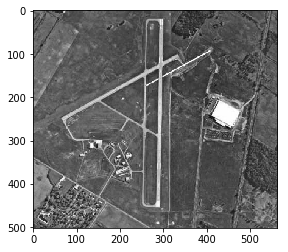

In [8]:
img = cv2.imread('aeroporto.png')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

plt.imshow(gray,cmap = 'gray')

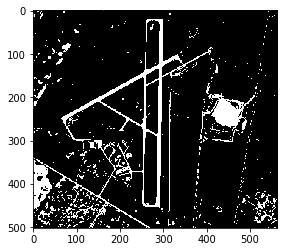

In [9]:
_,thresh = cv2.threshold(gray,120,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh,cmap = 'gray')

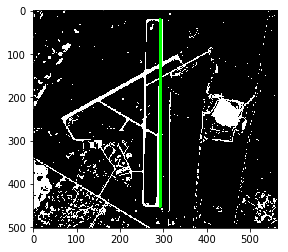

In [12]:
line = showLines(thresh,[0],-1)
plt.imshow(line[0])

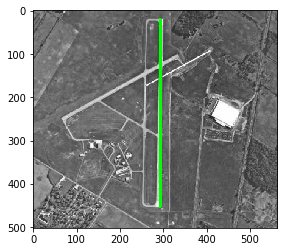

In [14]:
cv2.line(img,line[1],line[2],(0,255,0),5)
plt.imshow(img)